In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as ply
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats import ttest_ind,ttest_1samp
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import  SVC , NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    recall_score,precision_score,
    precision_recall_fscore_support,
    precision_recall_curve)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.shape

(253680, 22)

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
np.sum(df.isnull(),axis=0)

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
np.sum(df.duplicated())

23899

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(229781, 22)

**distribution of each column**

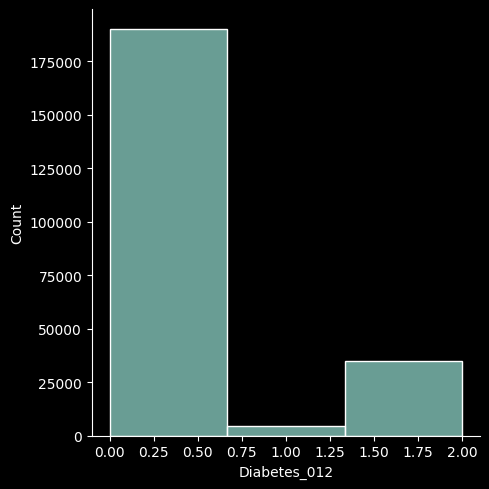

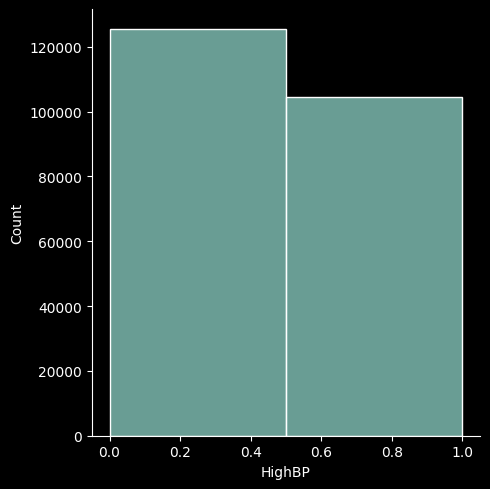

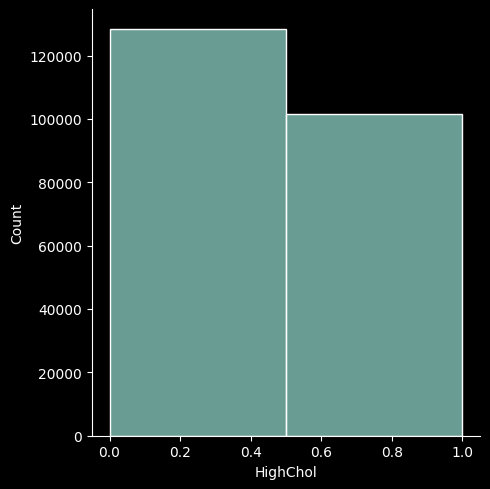

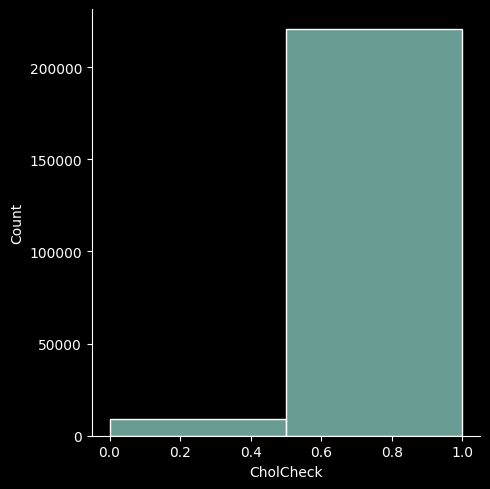

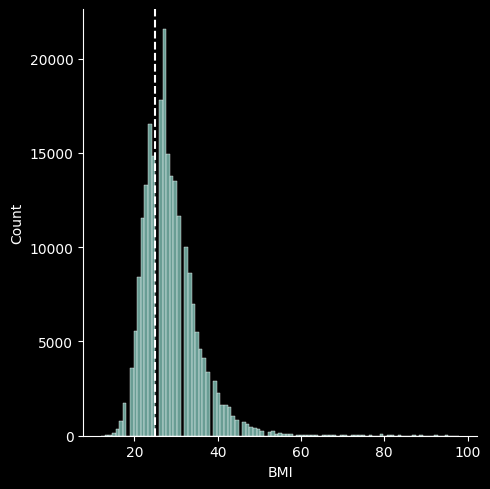

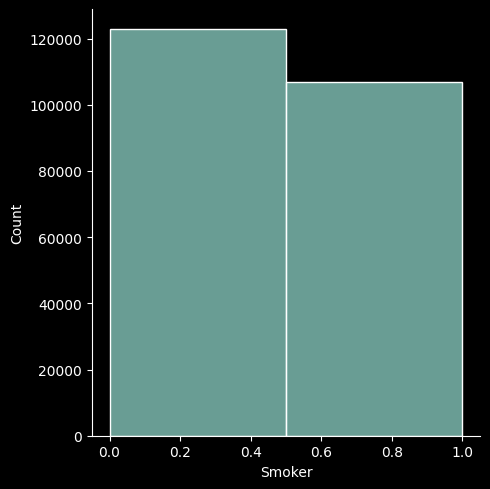

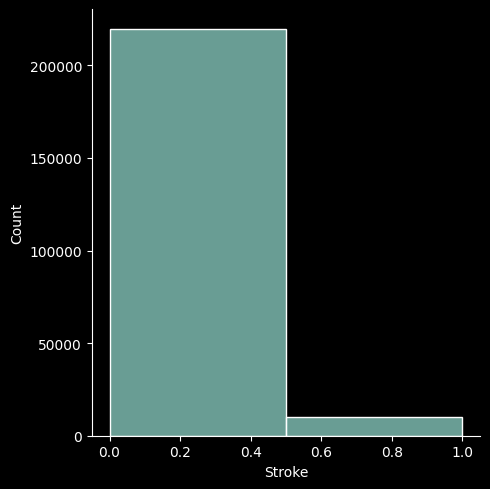

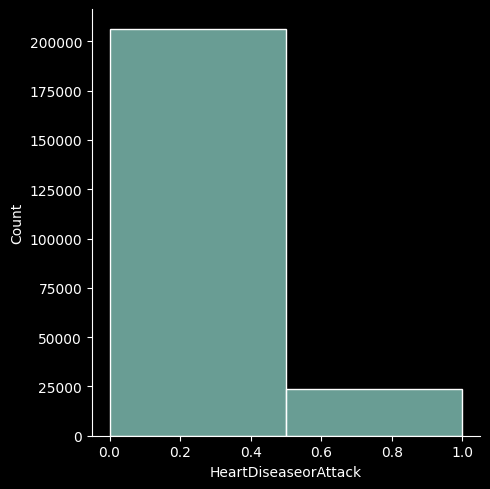

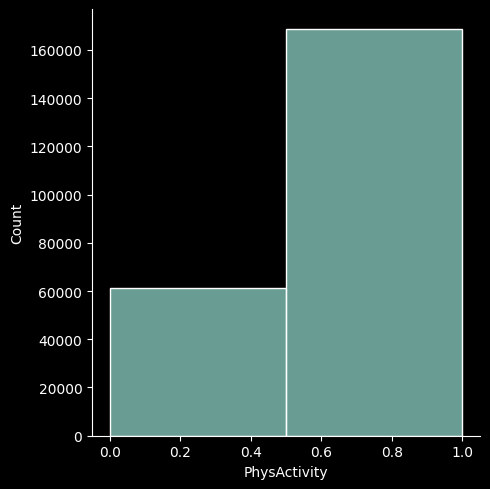

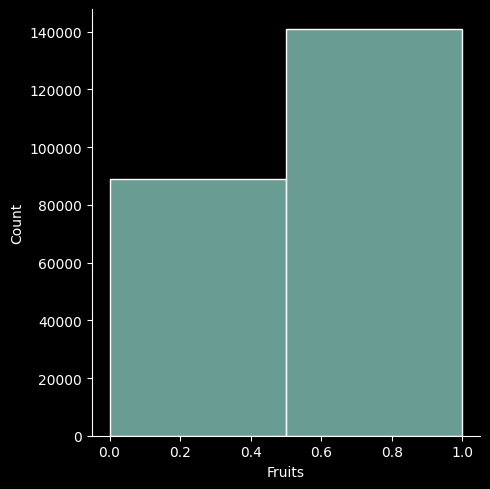

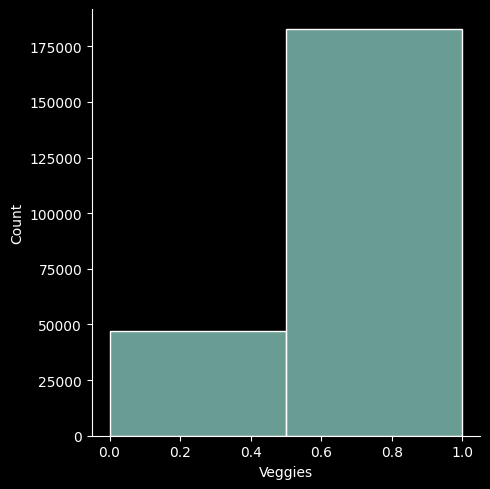

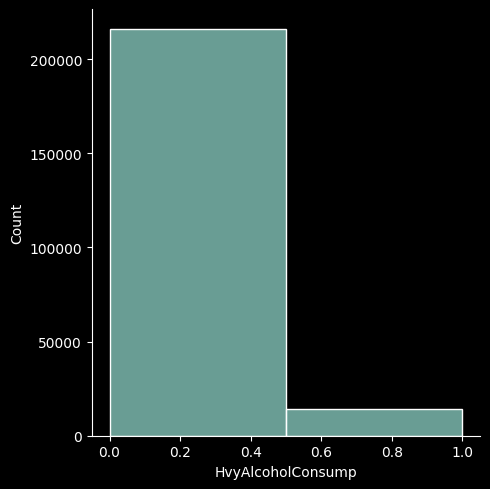

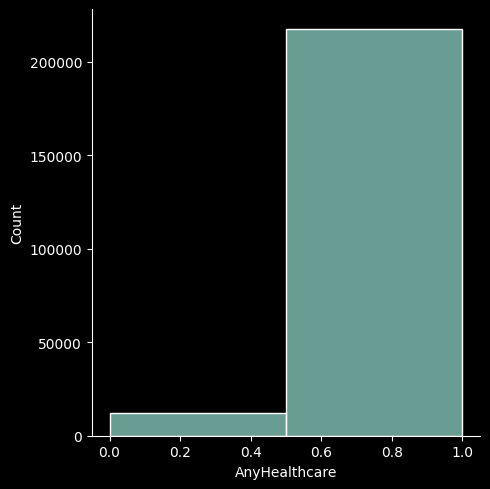

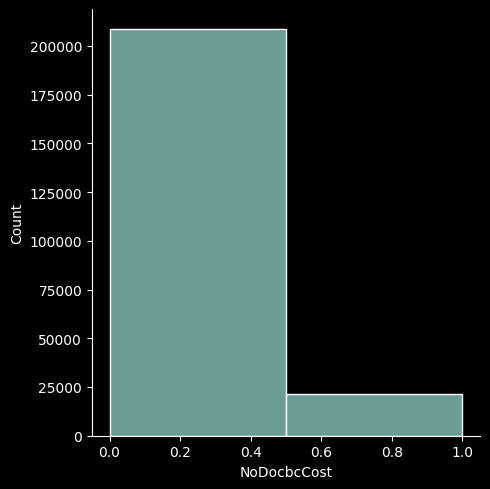

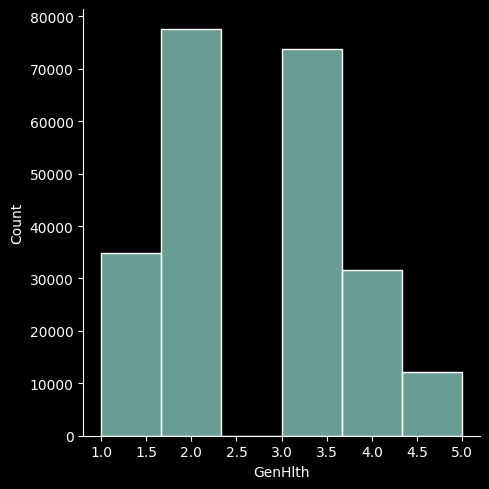

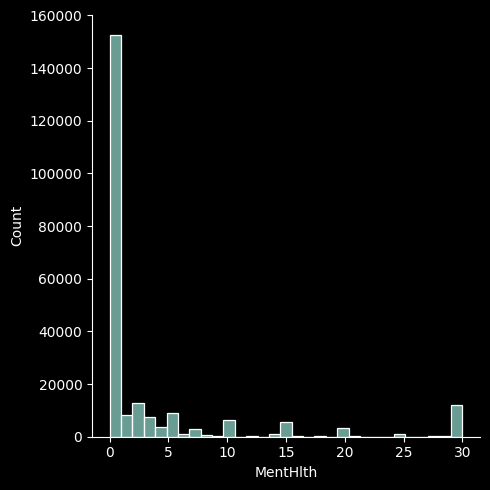

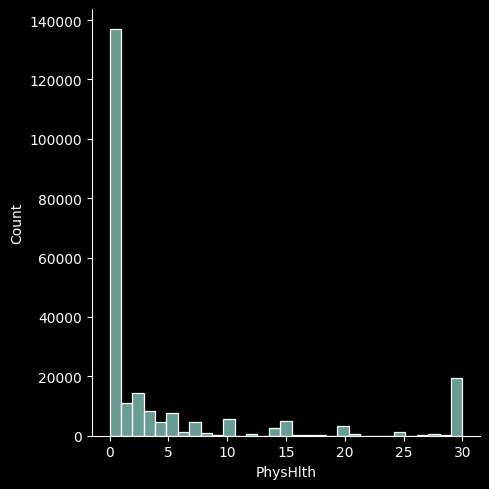

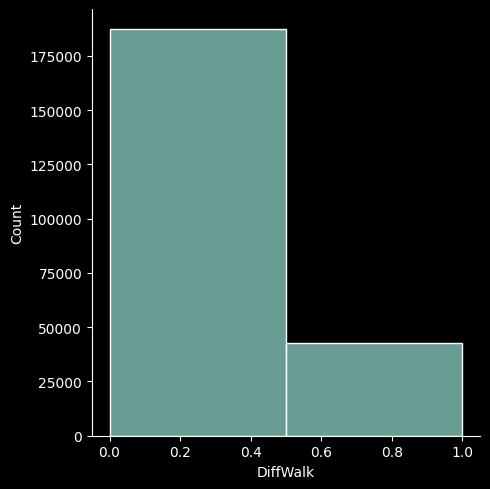

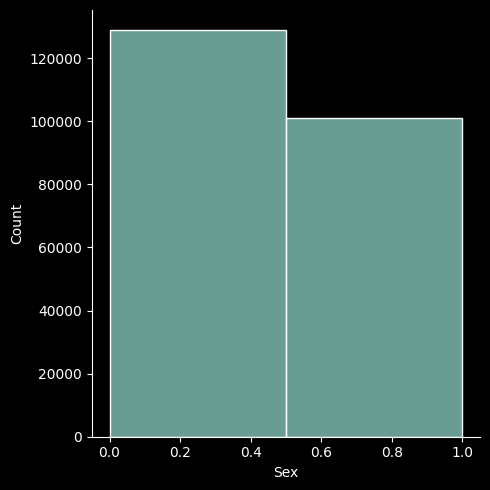

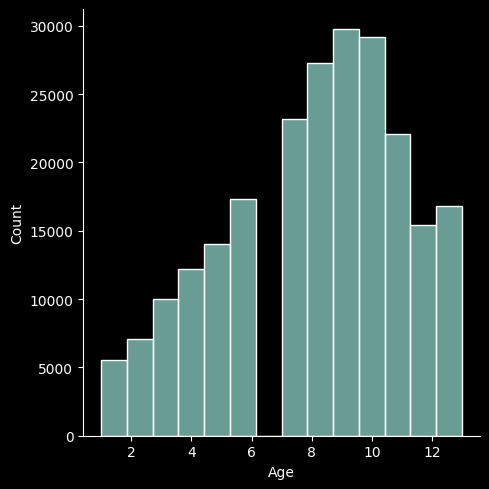

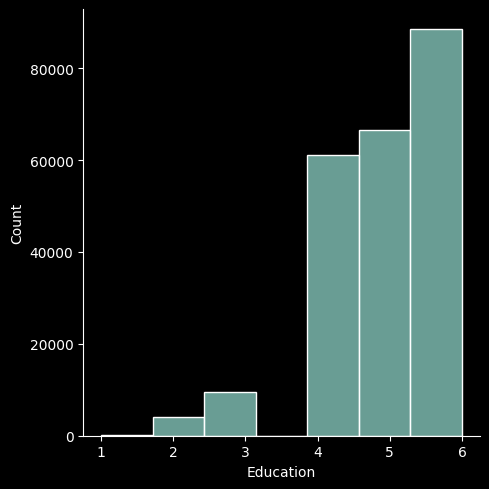

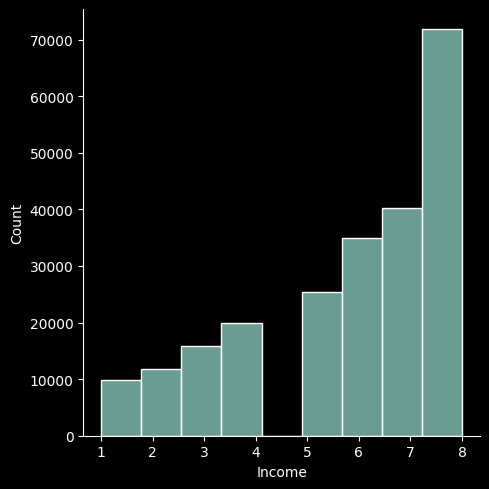

In [ ]:
sns.set_style()
plt.style.use('dark_background')
#fig,ax=plt.subplots(2,11,figsize=(99,21))
k=0
t=df.columns
for i in range(2):
  for j in range(11):
    e=math.ceil(max(df[t[k]]))#,ax=ax[i,j]
    sns.displot(df,x=t[k],bins=e+1)
    if t[k]=='BMI':
      plt.axvline(25,ls='--',lw=1.5)
    plt.savefig(f'all{j+11*i}')
    k+=1

In [ ]:
F=df.loc[df['Sex']==0]
M=df.loc[df['Sex']==1]
M.rename(columns={'BMI':'Male BMI'},inplace=True)
F.rename(columns={'BMI':'Female BMI'},inplace=True)

In [ ]:
F.head(8)

,Diabetes_012,HighBP,HighChol,CholCheck,Female BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0


In [ ]:
M.head(8)

,Diabetes_012,HighBP,HighChol,CholCheck,Male BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
19,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,10.0,0.0,0.0,1.0,4.0,6.0,8.0
22,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,7.0,0.0,1.0,5.0,5.0,5.0
26,2.0,1.0,1.0,1.0,37.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0,6.0,5.0
27,2.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0


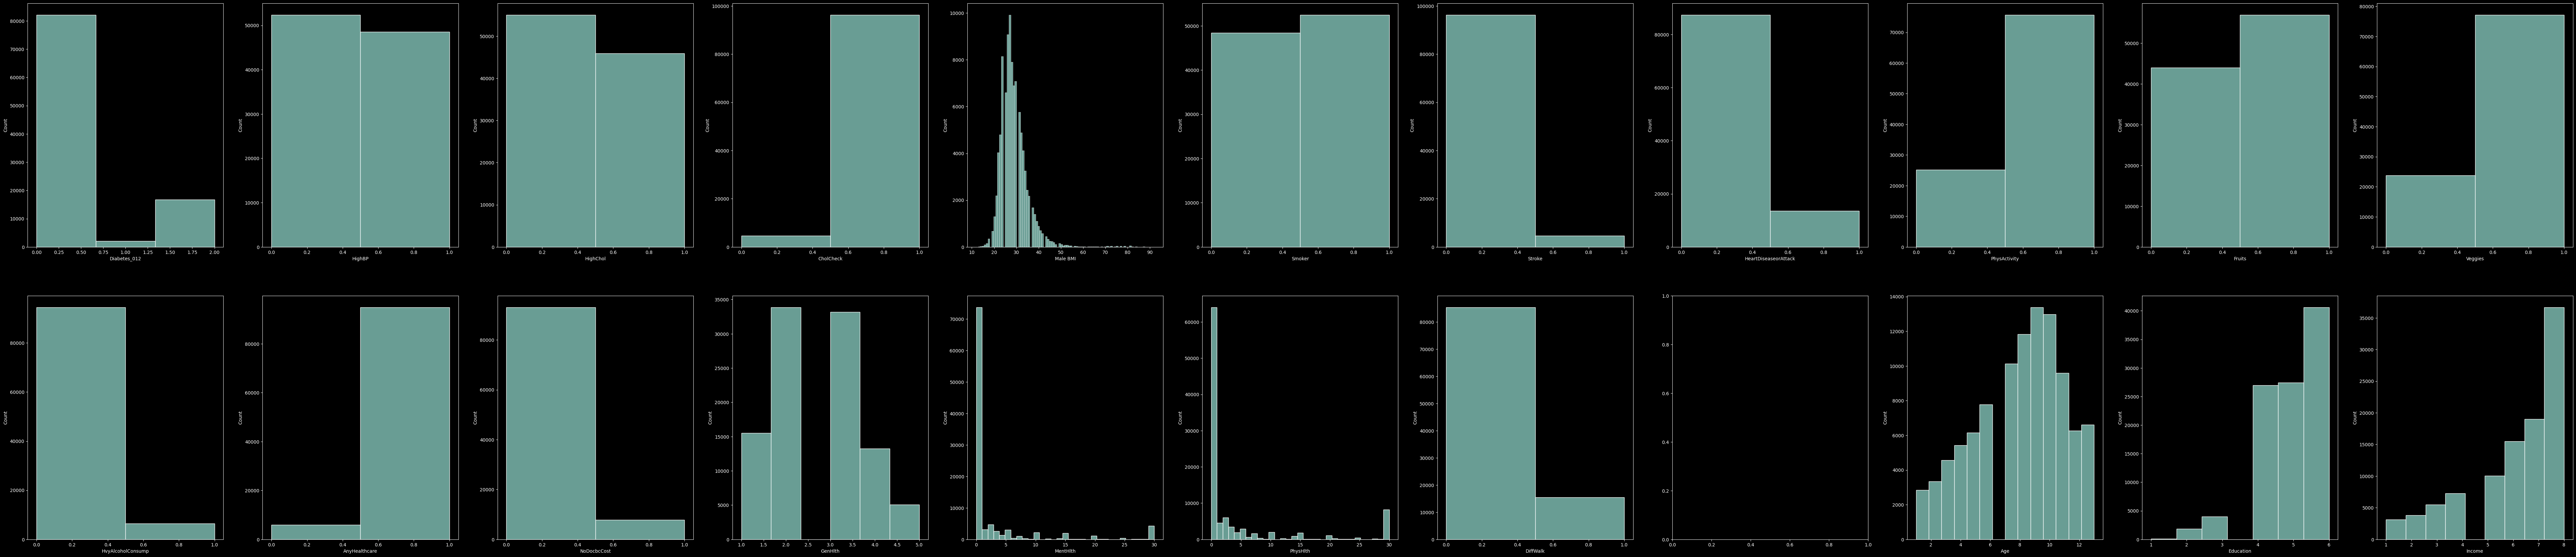

In [ ]:
fig,ax=plt.subplots(2,11,figsize=(99,21))
k=0
t=M.columns
for i in range(2):
  for j in range(11):
    if t[k]=='Sex':
      k+=1
      continue
    e=math.ceil(max(M[t[k]]))
    sns.histplot(M,x=t[k],ax=ax[i,j],bins=e+1)
    k+=1
plt.savefig(f'all_M{j+11*i}')


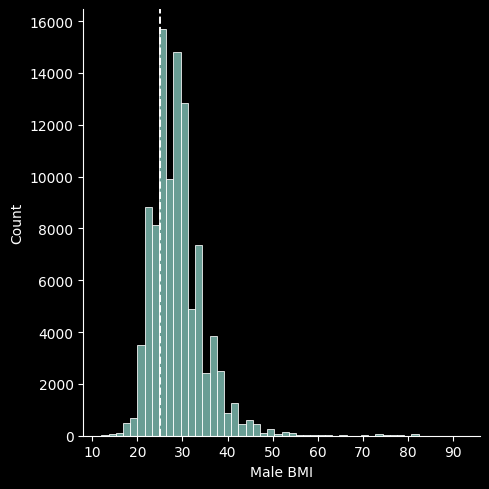

In [ ]:
sns.displot(M,x='Male BMI',bins=50)
plt.axvline(25,ls='--',lw=1.4)

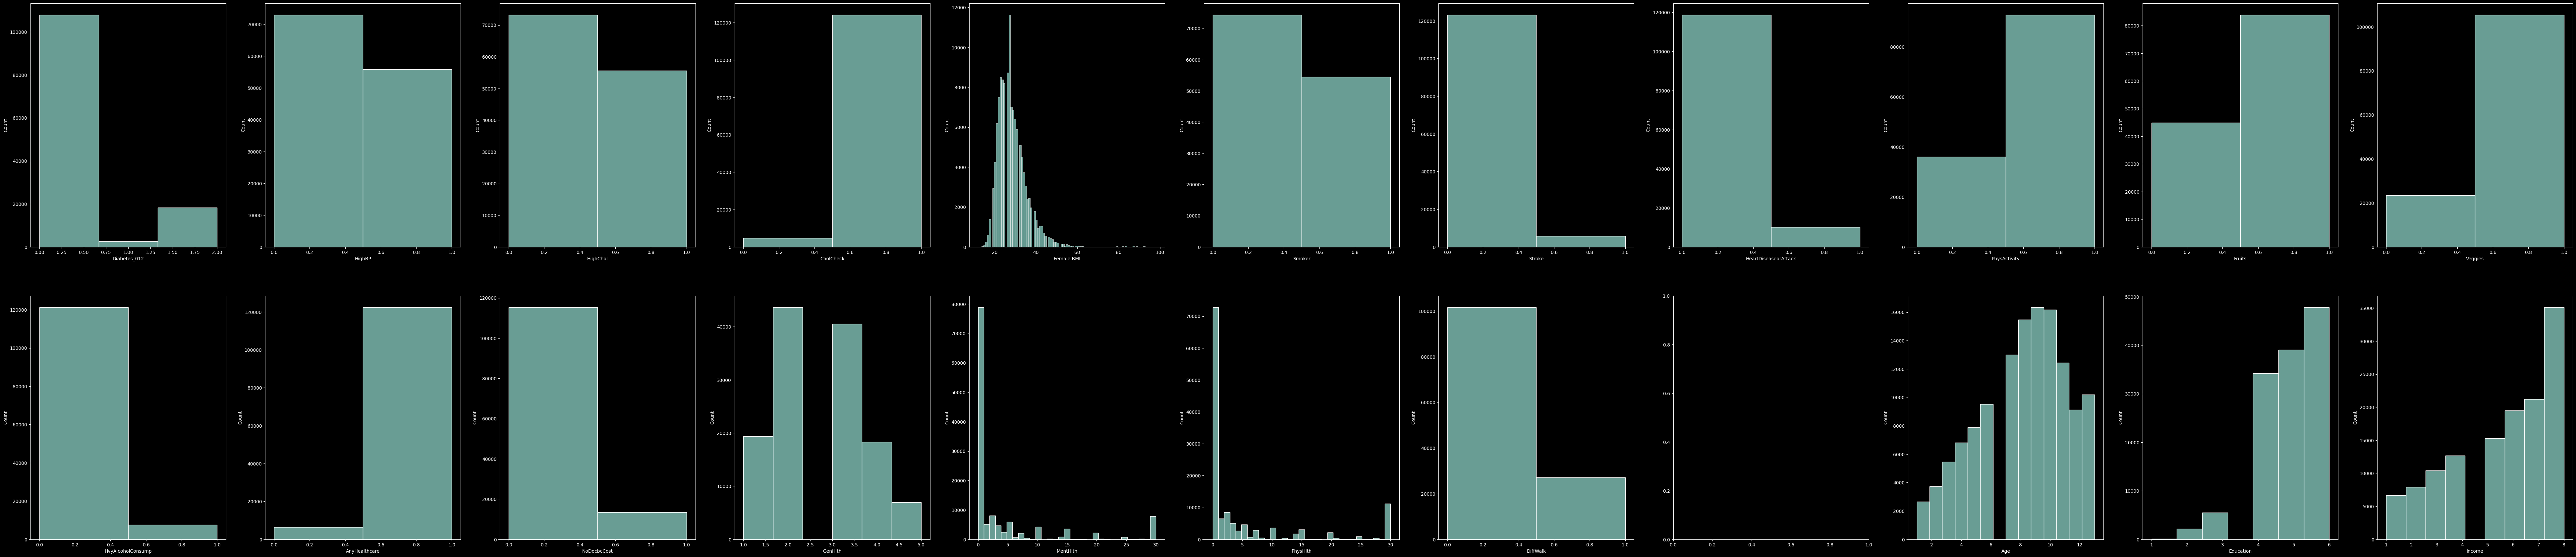

In [ ]:
fig,ax=plt.subplots(2,11,figsize=(99,21))
k=0
t=F.columns
for i in range(2):
  for j in range(11):
    if t[k]=='Sex':
      k+=1
      continue
    e=math.ceil(max(F[t[k]]))
    sns.histplot(F,x=t[k],ax=ax[i,j],bins=e+1)
    k+=1
plt.savefig(f'all_F{j+11*i}')

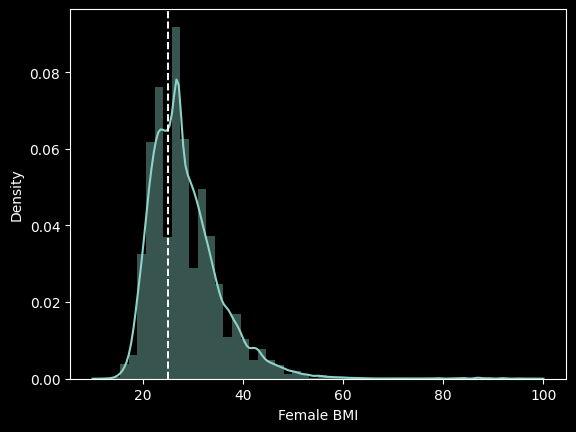

In [ ]:
sns.distplot(F['Female BMI'],bins=50,)
plt.axvline(25,ls='--',lw=1.4)

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

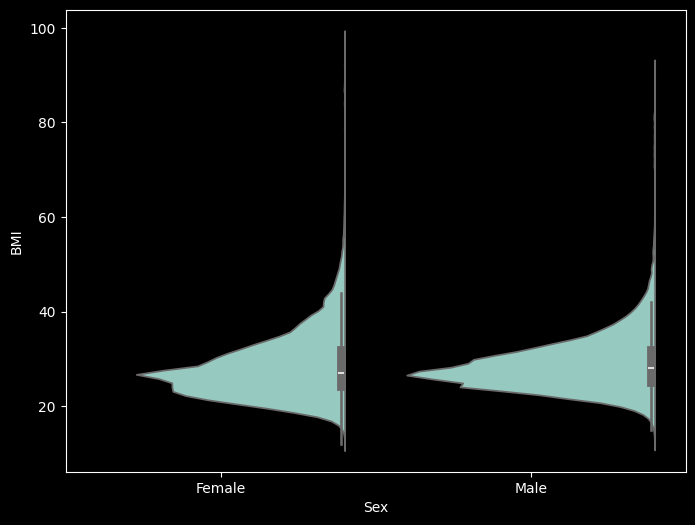

In [ ]:
fig1,ax1=plt.subplots(figsize=(8,6))
sns.violinplot(df,x='Sex',y='BMI',ax=ax1,split=True)
ax1.set_xticklabels(['Female','Male'])

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

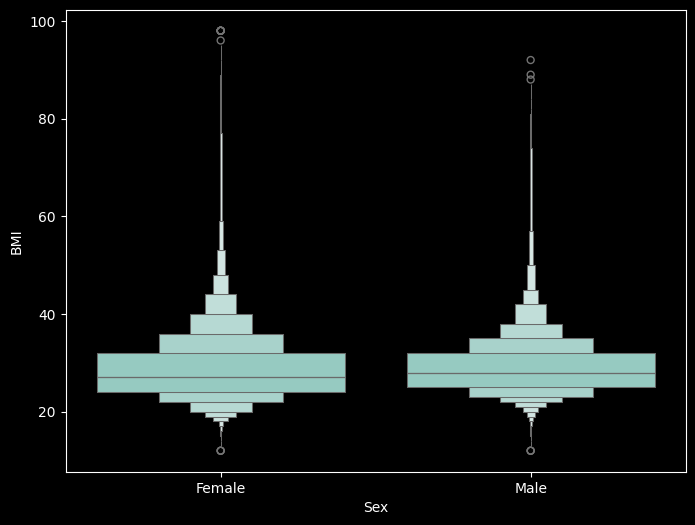

In [ ]:
fig1,ax1=plt.subplots(figsize=(8,6))
sns.boxenplot(df,x='Sex',y='BMI',ax=ax1)
ax1.set_xticklabels(['Female','Male'])

In [ ]:
len(F),len(M)

(128854, 100927)

In [ ]:
del M
del F

In [ ]:
corr_df=df.corr()
corr_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,0.170816,-0.103408,-0.025462,...,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,-0.107742,-0.147102
HighBP,0.261976,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.201271,-0.104131,-0.019329,...,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,-0.112676,-0.139782
HighChol,0.203327,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.176279,-0.063266,-0.026125,...,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,-0.049838,-0.061871
CholCheck,0.075701,0.111220,0.094753,1.000000,0.042420,-0.003776,0.027894,0.049995,-0.004409,0.017973,...,0.115539,-0.054198,0.062782,-0.001549,0.040612,0.048969,-0.024255,0.095996,-0.009758,0.002161
BMI,0.212027,0.194126,0.089615,0.042420,1.000000,-0.009196,0.011062,0.039926,-0.127864,-0.067528,...,-0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,-0.049347,-0.074568,-0.069192
Smoker,0.046774,0.074237,0.074627,-0.003776,-0.009196,1.000000,0.054438,0.105154,-0.066981,-0.061947,...,-0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,-0.135793,-0.095418
Stroke,0.100276,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.198863,-0.059440,-0.004613,...,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,-0.064319,-0.117232
HeartDiseaseorAttack,0.170816,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,1.000000,-0.073267,-0.007128,...,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,-0.082466,-0.122908
PhysActivity,-0.103408,-0.104131,-0.063266,-0.004409,-0.127864,-0.066981,-0.059440,-0.073267,1.000000,0.125283,...,0.024095,-0.046620,-0.237676,-0.106175,-0.199562,-0.235943,0.033586,-0.087539,0.171224,0.166171
Fruits,-0.025462,-0.019329,-0.026125,0.017973,-0.067528,-0.061947,-0.004613,-0.007128,0.125283,1.000000,...,0.022756,-0.032521,-0.071433,-0.052409,-0.024744,-0.030188,-0.088628,0.073726,0.085174,0.051230


<Axes: >

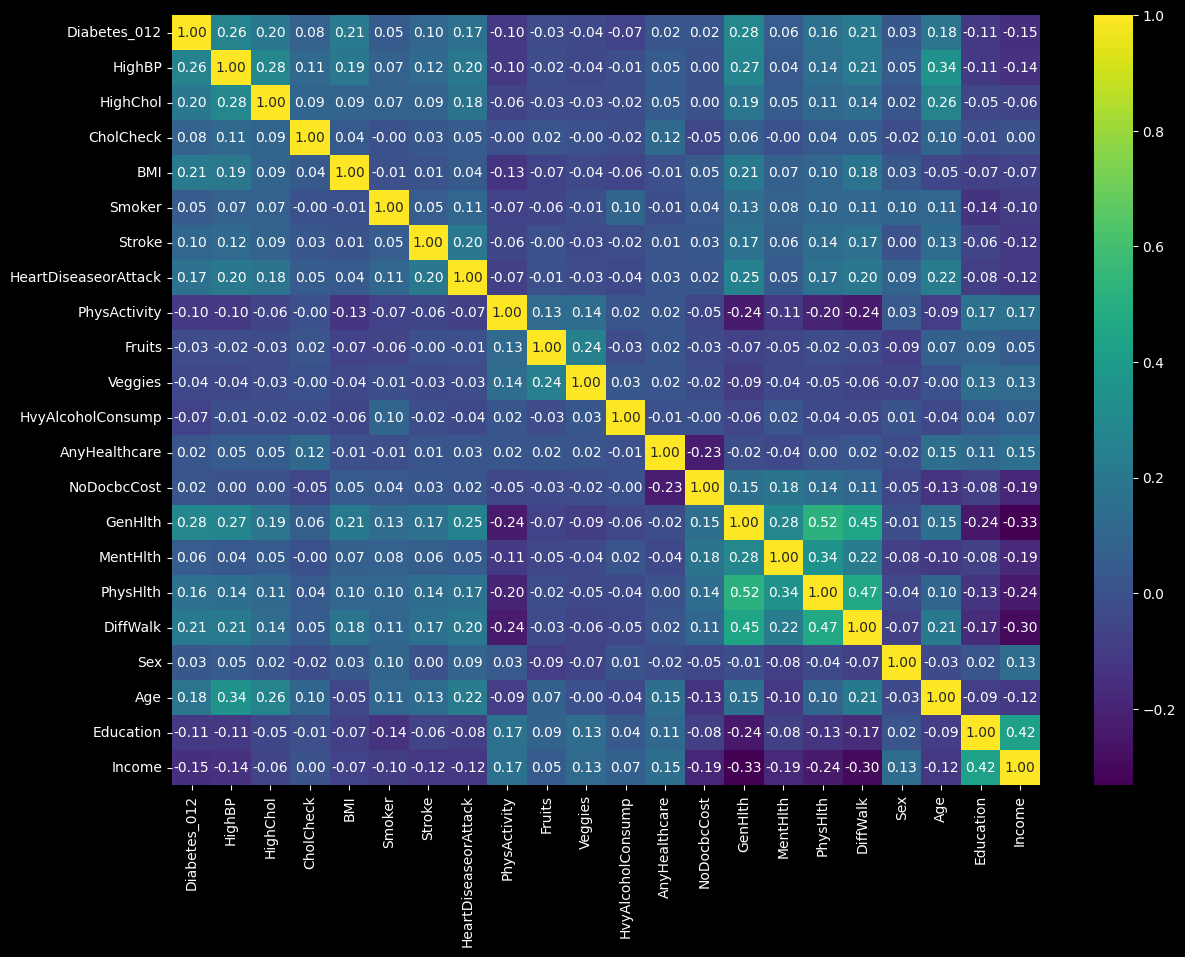

In [ ]:
fig_corr,ax_corr=plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True,fmt='.2f',ax=ax_corr)

In [ ]:
diadetes=corr_df.corrwith(corr_df['Diabetes_012'])

***Q1/sort coor features***

In [ ]:
diadetes.sort_values(ascending=False)

,0
Diabetes_012,1.000000
GenHlth,0.543811
HighBP,0.517389
DiffWalk,0.464380
BMI,0.405356
HighChol,0.392076
PhysHlth,0.369062
Age,0.357207
HeartDiseaseorAttack,0.352166
Stroke,0.209405


<Axes: ylabel='count'>

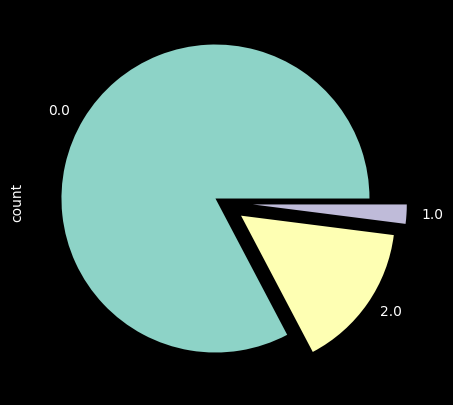

In [ ]:
f,ax = plt.subplots(figsize=(12,5))
df['Diabetes_012'].value_counts().plot.pie(explode=[0.05,0.15,0.2],ax=ax)

In [ ]:
df['Diabetes_012'].value_counts()


,count
Diabetes_012,
0.0,190055
2.0,35097
1.0,4629


In [ ]:
df['Diabetes_012']=df['Diabetes_012'].replace({2:1})

<Axes: ylabel='count'>

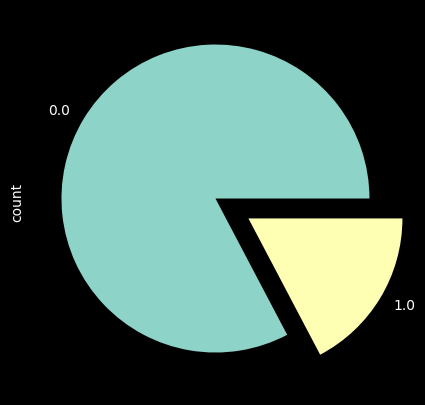

In [ ]:
f,ax = plt.subplots(figsize=(12,5))
df['Diabetes_012'].value_counts().plot.pie(explode=[0.05,0.2],ax=ax)

In [ ]:
X=df.drop('Diabetes_012',axis=1)
Y=df['Diabetes_012']

In [ ]:
x_train,x_temp,y_train,y_temp=train_test_split(X,Y,stratify=Y,random_state=42,test_size=0.3)

In [ ]:
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,random_state=42,test_size=0.2)

In [ ]:
x_train.shape[0],x_val.shape[0],x_test.shape[0]

(160846, 55148, 13787)

In [ ]:
y_train.value_counts()

,count
Diabetes_012,
0.0,133038
1.0,27808


**SCALE**

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train_scale=scaler.fit_transform(x_train)

In [ ]:
x_val_scale=scaler.transform(x_val)

**PCA**

In [ ]:
pca=PCA(n_components=0.9)

In [ ]:
x_train_pca=pca.fit_transform(x_train_scale)

In [ ]:
x_val_pca=pca.transform(x_val_scale)

**RandomForest**

In [ ]:
#RandomForestClassifier
forest_model=RandomForestClassifier(random_state=42,n_estimators=120)
forest_model.fit(x_train_pca,y_train)

RandomForestClassifier(n_estimators=120, random_state=42)

In [ ]:
forest_y_pred=forest_model.predict(x_val_pca)

In [ ]:
forst_class=classification_report(y_val,forest_y_pred)
print(forst_class)

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     45678
         1.0       0.48      0.18      0.26      9470

    accuracy                           0.83     55148
   macro avg       0.67      0.57      0.58     55148
weighted avg       0.79      0.83      0.79     55148



In [ ]:
forest_recall=recall_score(y_val,forest_y_pred)
forest_recall

0.17972544878563887

In [ ]:
 forest_f1=f1_score(y_val,forest_y_pred)
 forest_f1

0.2620679036107476

In [ ]:
forest_precision=precision_score(y_val,forest_y_pred)
forest_precision

0.48366013071895425

In [ ]:
forest_accuracy=accuracy_score(y_val,forest_y_pred)
forest_accuracy

0.8261949662725756

Text(50.722222222222214, 0.5, 'True')

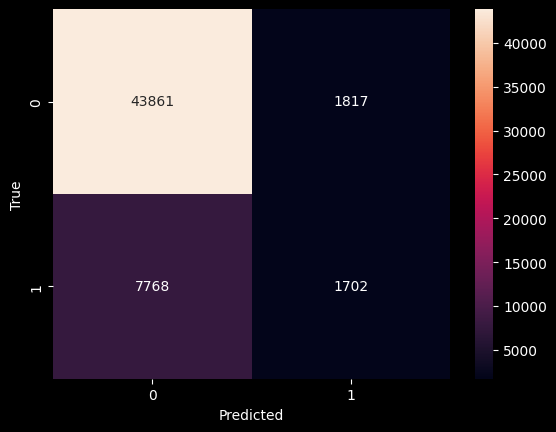

In [ ]:
forest_confusion=confusion_matrix(y_val,forest_y_pred)
sns.heatmap(forest_confusion,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

**Oversampling**

In [ ]:
#Oversampling(SMOTE)
smote=SMOTE(random_state=42)
x_over_train,y_over_train=smote.fit_resample(x_train,y_train)



In [ ]:
x_over_train.shape[0]

266076

In [ ]:
y_over_train.value_counts()

,count
Diabetes_012,
0.0,133038
1.0,133038


In [ ]:
x_over_train_scale=scaler.transform(x_over_train)
x_over_train_pca=pca.transform(x_over_train_scale)
forest_model=RandomForestClassifier(random_state=42,n_estimators=120)
forest_model.fit(x_over_train_pca,y_over_train)

In [ ]:
forest_y_pred=forest_model.predict(x_val_pca)

In [ ]:
forst_class=classification_report(y_val,forest_y_pred)
print(forst_class)

In [ ]:
forest_recall=recall_score(y_val,forest_y_pred)
forest_recall

In [ ]:
 forest_f1=f1_score(y_val,forest_y_pred)
 forest_f1

In [ ]:
forest_precision=precision_score(y_val,forest_y_pred)
forest_precision

In [ ]:
forest_accuracy=accuracy_score(y_val,forest_y_pred)
forest_accuracy

In [ ]:
forest_confusion=confusion_matrix(y_val,forest_y_pred)
sns.heatmap(forest_confusion,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

**Undeersampling**

In [ ]:
#Undersampling
under_sample=RandomUnderSampler(random_state=42)
x_under_train,y_under_train=under_sample.fit_resample(x_train,y_train)

In [ ]:
x_under_train.shape[0]

In [ ]:
y_under_train.value_counts()

In [ ]:
x_under_train_scale=scaler.transform(x_under_train)
x_under_train_pca=pca.transform(x_under_train_scale)
forest_model=RandomForestClassifier(random_state=42,n_estimators=120)
forest_model.fit(x_under_train_pca,y_under_train)

In [ ]:
forest_y_pred=forest_model.predict(x_val_pca)

In [ ]:
forst_class=classification_report(y_val,forest_y_pred)
print(forst_class)

In [ ]:
forest_recall=recall_score(y_val,forest_y_pred)
forest_recall

In [ ]:
 forest_f1=f1_score(y_val,forest_y_pred)
 forest_f1

In [ ]:
forest_precision=precision_score(y_val,forest_y_pred)
forest_precision

In [ ]:
forest_accuracy=accuracy_score(y_val,forest_y_pred)
forest_accuracy

In [ ]:
forest_confusion=confusion_matrix(y_val,forest_y_pred)
sns.heatmap(forest_confusion,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

**NuSVC**

In [ ]:
parametr_NuSVC={'nu':[0.5,0.1],
          'kernel':['rbf','poly'],
          'gamma':['auto',0.1,0.01]}

In [ ]:
grid_NuSVC=GridSearchCV(NuSVC(),param_grid=parametr_NuSVC,verbose=3,cv=5,n_jobs=-1,refit=True,return_train_score=True)
grid_NuSVC.fit(x_under_train_pca,y_under_train)

In [ ]:
y_pred_NuSVC=grid_NuSVC.predict(x_val_pca)

**SVD**

In [ ]:
parametr_SVC = {'C': [10, 100, 1000,1200,1350],
              'gamma': ['auto',0.1,0.01,1.2],
              'kernel': ['rbf','poly']}

In [ ]:
grid_SVC=GridSearchCV(SVC(),param_grid=parametr_SVC,verbose=3,cv=5,n_jobs=-1,refit=True,return_train_score=True)
grid_SVC.fit(x_train,y_train)

In [ ]:
y_pred_SVC=grid_SVC.predict(x_val)

In [ ]:
y_pred=forest_model.predict(x_val)
classification_report(y_val,y_pred)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)


voting_clf = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('svc', model3)],
    voting='soft')

voting_clf.fit(X_train, y_train)

predictions = voting_clf.predict(X_test)
